<a href="https://colab.research.google.com/github/easyforitall/Classification-Model/blob/main/001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA IMPORTING

In [ ]:
from fastparquet import ParquetFile
pf = ParquetFile("/content/sample_data/train.parquet")
dataFrame = pf.to_pandas()
dataFrame.to_csv("train.csv", index = False)

In [ ]:
df_train = pd.read_csv("/content/train.csv")
df_train.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [ ]:
from fastparquet import ParquetFile
pf = ParquetFile("/content/sample_data/test.parquet")
dataFrame = pf.to_pandas()
dataFrame.to_csv("test.csv", index = False)

In [ ]:
df_test = pd.read_csv("/content/test.csv")
df_test.head()

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0


DATA CLEANING AND ANALYSIS

In [ ]:
print(df_train.shape)
print(df_test.shape)

(3220868, 3)
(1065524, 3)


In [ ]:
df_train["Incident"].value_counts()

DRUG_TYPE_6          561934
DRUG_TYPE_1          484666
PRIMARY_DIAGNOSIS    431902
DRUG_TYPE_0          300005
DRUG_TYPE_7          258782
DRUG_TYPE_2          256841
DRUG_TYPE_8          160066
DRUG_TYPE_3          127676
TEST_TYPE_1           96810
TARGET DRUG           67218
DRUG_TYPE_9           66894
DRUG_TYPE_5           57510
DRUG_TYPE_11          48118
SYMPTOM_TYPE_0        46078
SYMPTOM_TYPE_6        32066
TEST_TYPE_0           27570
SYMPTOM_TYPE_7        22019
DRUG_TYPE_10          20925
DRUG_TYPE_14          17306
DRUG_TYPE_13          12372
DRUG_TYPE_12           9551
SYMPTOM_TYPE_14        8927
SYMPTOM_TYPE_1         8608
SYMPTOM_TYPE_2         8168
TEST_TYPE_3            8115
SYMPTOM_TYPE_5         7583
SYMPTOM_TYPE_8         7430
TEST_TYPE_2            7021
SYMPTOM_TYPE_15        6295
SYMPTOM_TYPE_10        6005
SYMPTOM_TYPE_29        5950
SYMPTOM_TYPE_16        4940
DRUG_TYPE_15           4906
SYMPTOM_TYPE_9         4885
DRUG_TYPE_4            4566
SYMPTOM_TYPE_4      

In [ ]:
df_test["Incident"].value_counts()

DRUG_TYPE_6          192292
DRUG_TYPE_1          169127
PRIMARY_DIAGNOSIS    130511
DRUG_TYPE_7           93002
DRUG_TYPE_0           91059
DRUG_TYPE_2           90629
DRUG_TYPE_8           56213
DRUG_TYPE_3           41091
TEST_TYPE_1           34274
DRUG_TYPE_9           25294
DRUG_TYPE_5           20692
DRUG_TYPE_11          17542
SYMPTOM_TYPE_0        17292
SYMPTOM_TYPE_6        11536
TEST_TYPE_0           10921
SYMPTOM_TYPE_7         7943
SYMPTOM_TYPE_5         5403
DRUG_TYPE_14           4963
DRUG_TYPE_10           4245
DRUG_TYPE_13           4079
SYMPTOM_TYPE_1         2955
DRUG_TYPE_12           2826
SYMPTOM_TYPE_2         2772
TEST_TYPE_3            2709
SYMPTOM_TYPE_8         2683
TEST_TYPE_2            2524
SYMPTOM_TYPE_14        2482
DRUG_TYPE_4            1840
SYMPTOM_TYPE_15        1818
SYMPTOM_TYPE_10        1783
SYMPTOM_TYPE_29        1703
SYMPTOM_TYPE_9         1689
SYMPTOM_TYPE_16        1576
DRUG_TYPE_15           1373
SYMPTOM_TYPE_4         1315
SYMPTOM_TYPE_3      

In [ ]:
df_train["Patient-Uid"]. value_counts().shape

(27033,)

In [ ]:
df_train.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [ ]:
df_train.duplicated().sum()

35571

In [ ]:
df_train[df_train.duplicated()]

,Patient-Uid,Date,Incident
1991,a0dca226-1c7c-11ec-9eef-16262ee38c7f,2020-07-24,DRUG_TYPE_6
2199,a0dcc4e6-1c7c-11ec-bbd2-16262ee38c7f,2015-10-13,DRUG_TYPE_5
3191,a0dd0d0e-1c7c-11ec-9bd5-16262ee38c7f,2015-06-18,PRIMARY_DIAGNOSIS
5329,a0de5949-1c7c-11ec-b2e8-16262ee38c7f,2019-08-22,DRUG_TYPE_8
5887,a0ddc121-1c7c-11ec-b9ca-16262ee38c7f,2018-04-03,DRUG_TYPE_7
...,...,...,...
3220524,a0ef0c1e-1c7c-11ec-a241-16262ee38c7f,2015-12-30,DRUG_TYPE_7
3220573,a0eee1ee-1c7c-11ec-ba37-16262ee38c7f,2019-07-17,DRUG_TYPE_7
3220614,a0f08b3a-1c7c-11ec-bfcf-16262ee38c7f,2017-06-13,DRUG_TYPE_7
3220676,a0efd1e7-1c7c-11ec-94ed-16262ee38c7f,2018-07-24,DRUG_TYPE_7


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220868 entries, 0 to 3220867
Data columns (total 3 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Patient-Uid  object
 1   Date         object
 2   Incident     object
dtypes: object(3)
memory usage: 73.7+ MB


In [ ]:
df_test.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [ ]:
df_test.duplicated().sum()

12100

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065524 entries, 0 to 1065523
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Patient-Uid  1065524 non-null  object
 1   Date         1065524 non-null  object
 2   Incident     1065524 non-null  object
dtypes: object(3)
memory usage: 24.4+ MB


CONVERTING DATE COLUMN FROM OBJECT TO DATE

In [ ]:
df_train["Date"] = pd.to_datetime(df_train["Date"])
df_test["Date"] = pd.to_datetime(df_test["Date"])

In [ ]:
df1 = df_train[df_train["Incident"]=='TARGET DRUG']
df1.head()

,Patient-Uid,Date,Incident
2089053,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG
2089073,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG
2089219,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG
2089334,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG
2089339,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG


In [ ]:
df2 = pd.DataFrame(df1,index=None)
#df2.reset_index(inplace=True)
df2.drop("index",axis=1,inplace=True)
df2.head()

,Patient-Uid,Date,Incident
0,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG
1,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG
2,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG
3,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG
4,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG


In [ ]:
df2.loc[0]

Patient-Uid    a0eb742b-1c7c-11ec-8f61-16262ee38c7f
Date                            2020-04-09 00:00:00
Incident                                TARGET DRUG
Name: 0, dtype: object

In [ ]:
df2.head()

,Patient-Uid,Date,Incident
0,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG
1,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG
2,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG
3,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG
4,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG


In [ ]:
df2 = df2.sort_values(by='Patient-Uid')
df2

,Patient-Uid,Date,Incident
1838,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG
15431,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG
13312,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG
66648,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-06-13,TARGET DRUG
55878,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2019-07-09,TARGET DRUG
...,...,...,...
34427,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG
54134,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG
21832,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,TARGET DRUG
40938,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-18,TARGET DRUG


In [ ]:
df2["DayofDate"] = df2["Date"].dt.day

In [ ]:
df2.head()

,Patient-Uid,Date,Incident,DayofDate
1838,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG,5
15431,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG,8
13312,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG,2
66648,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-06-13,TARGET DRUG,13
55878,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2019-07-09,TARGET DRUG,9


In [ ]:
li1 = []
for i in df2["Patient-Uid"]:
  if i not in li1:
    li1.append(i)

In [ ]:
li3 = []
for i in li1:
  li3.append(1)
  a = df2[df2["Patient-Uid"]==i]
  a.reset_index(inplace=True)
  a.drop("index",axis=1,inplace=True)
  s = 0
  for j in range(0,len(a)-1):
    if a["DayofDate"][s]+a["DayofDate"][j+1]<30 and a["DayofMonth"][s]!=a["DayofMonth"][j+1]:
      li3.append(0)
    else:
      li3.append(1)
      s = j
print(li3)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 

In [ ]:
df2["label"] = li3

In [ ]:
df2.sort_index(axis=0)

,Patient-Uid,Date,Incident,DayofDate,label
0,a0eb742b-1c7c-11ec-8f61-16262ee38c7f,2020-04-09,TARGET DRUG,9,0
1,a0edaf09-1c7c-11ec-a360-16262ee38c7f,2018-06-12,TARGET DRUG,12,0
2,a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f,2019-06-11,TARGET DRUG,11,0
3,a0ecc615-1c7c-11ec-aa31-16262ee38c7f,2019-11-15,TARGET DRUG,15,1
4,a0ea612f-1c7c-11ec-8cf0-16262ee38c7f,2020-03-18,TARGET DRUG,18,1
...,...,...,...,...,...
67213,a0ef2b6d-1c7c-11ec-9172-16262ee38c7f,2018-10-12,TARGET DRUG,12,1
67214,a0ebe423-1c7c-11ec-a5e0-16262ee38c7f,2019-07-02,TARGET DRUG,2,0
67215,a0ebc713-1c7c-11ec-bd53-16262ee38c7f,2019-05-21,TARGET DRUG,21,1
67216,a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f,2018-06-07,TARGET DRUG,7,0


In [ ]:
df3 = df2.copy()

In [ ]:
df2["index"] = df1["index"]

In [ ]:
df2.set_index("index",inplace=True)

In [ ]:
df2.head()

,Patient-Uid,Date,Incident,DayofDate,label
index,,,,,
2118840,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG,5,1
2200498,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG,8,0
2188616,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG,2,0
3206356,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-06-13,TARGET DRUG,13,1
2950771,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2019-07-09,TARGET DRUG,9,0


In [ ]:
df2.drop(["Incident","DayofDate"],axis=1,inplace=True)

In [ ]:
li1 = []
for i in df1["Patient-Uid"]:
  if i not in li1:
    li1.append(i)

ENCODING OF TRAIN & TEST DATA

In [ ]:
count = 0
for i in range(23912,len(df_test["Patient-Uid"])+1):
  if df_test["Patient-Uid"][i] in li1:
    count = count + 1
print(count)

0


In [ ]:
df_test.drop("Incident",axis=1,inplace=True)

In [ ]:
data_train = pd.read_csv("/content/sample_data/cleaned_data.csv")
data_train.head()

,Unnamed: 0,Patient-Uid,Date,Incident,DayofDate,label
0,1838,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG,5,1
1,15431,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG,8,0
2,13312,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG,2,0
3,66648,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-06-13,TARGET DRUG,13,1
4,55878,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2019-07-09,TARGET DRUG,9,0


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67218 entries, 0 to 67217
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Patient-Uid  67218 non-null  object
 1   Date         67218 non-null  object
 2   DayofDate    67218 non-null  int64 
 3   label        67218 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.1+ MB


In [ ]:
data_train["Date"] = pd.to_datetime(data_train["Date"])

In [ ]:
data_train.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
data_train.drop('Incident',axis=1,inplace=True)

In [ ]:
data_train["MonthofDate"] = data_train["Date"].dt.month
data_train["YearofDate"] = data_train["Date"].dt.year
df_test["DayofDate"] = df_test["Date"].dt.day
df_test["MonthofDate"] = df_test["Date"].dt.month
df_test["YearofDate"] = df_test["Date"].dt.year

In [ ]:
data_train.drop('Date',axis=1,inplace=True)
df_test.drop("Date",axis=1,inplace=True)

In [ ]:
data_train.head()

,Patient-Uid,DayofDate,label,MonthofDate,YearofDate
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,5,1,8,2020
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,8,0,7,2020
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2,0,9,2020
3,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,13,1,6,2018
4,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,9,0,7,2019


In [ ]:
df_test.head()

,Patient-Uid,DayofDate,MonthofDate,YearofDate
23912,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,16,6,2016
23913,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,12,9,2015
23914,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,26,6,2016
23915,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,25,2,2016
23916,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,4,5,2016


In [ ]:
df_test1 = df_test.copy()

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data_train['Patient-Uid']= label_encoder.fit_transform(data_train["Patient-Uid"])
data_train['Patient-Uid'].unique()

array([   0,    1,    2, ..., 9371, 9372, 9373])

In [ ]:
data_train.corr()

,Patient-Uid,DayofDate,label,MonthofDate,YearofDate
Patient-Uid,1.000000,0.004250,0.026255,0.002638,0.034633
DayofDate,0.004250,1.000000,0.499883,0.009977,-0.033080
label,0.026255,0.499883,1.000000,0.007276,-0.002350
MonthofDate,0.002638,0.009977,0.007276,1.000000,-0.431095
YearofDate,0.034633,-0.033080,-0.002350,-0.431095,1.000000


AS WE OBSERVED HERE THERE WAS A LESS CORRELATION OF PATIENT-UID,YEAR AND MONTH WITH LABEL SO REMOVING THOSE COLUMNS

In [ ]:
df_test['Patient-Uid']= label_encoder.fit_transform(df_test["Patient-Uid"])
df_test['Patient-Uid'].unique()

array([    0,     1,     2, ..., 11259, 11260, 11261])

SCALING OF DATA BECAUSE THERE IS LARGE DIFFERENCE BETWEEN THE COLUMN VALUES

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['Patient-Uid','DayofDate','MonthofDate',"YearofDate"]
scaler = MinMaxScaler()
data_train[cols_to_scale] = scaler.fit_transform(data_train[cols_to_scale])
df_test[cols_to_scale] = scaler.fit_transform(df_test[cols_to_scale])

SPLITTING THE DATA INTO TRAIN & TEST

In [ ]:
training_features = data_train[["DayofDate"]]
train_label = data_train.label

In [ ]:
training_features.shape

(67218, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_features,train_label, test_size=0.20, random_state=42)

In [ ]:
test_features = df_test[["DayofDate"]]

MODEL BUILDING

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(1,)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs = 25)

Epoch 1/25
1681/1681 [==============================] - 5s 3ms/step - loss: 0.5592 - accuracy: 0.7088
Epoch 2/25
1681/1681 [==============================] - 4s 3ms/step - loss: 0.5472 - accuracy: 0.7198
Epoch 3/25
1681/1681 [==============================] - 4s 2ms/step - loss: 0.5457 - accuracy: 0.7190
Epoch 4/25
1681/1681 [==============================] - 4s 2ms/step - loss: 0.5447 - accuracy: 0.7198
Epoch 5/25
1681/1681 [==============================] - 4s 2ms/step - loss: 0.5442 - accuracy: 0.7199
Epoch 6/25
1681/1681 [==============================] - 4s 2ms/step - loss: 0.5437 - accuracy: 0.7196
Epoch 7/25
1681/1681 [==============================] - 4s 2ms/step - loss: 0.5435 - accuracy: 0.7197
Epoch 8/25
1681/1681 [==============================] - 4s 3ms/step - loss: 0.5432 - accuracy: 0.7191
Epoch 9/25
1681/1681 [==============================] - 4s 2ms/step - loss: 0.5430 - accuracy: 0.7195
Epoch 10/25
1681/1681 [==============================] - 4s 2ms/step - loss: 0.542

In [ ]:
y_pred=model.predict(X_test)
y_pred

421/421 [==============================] - 1s 2ms/step


array([[0.20112269],
       [0.56610477],
       [0.3968786 ],
       ...,
       [0.7553254 ],
       [0.6332918 ],
       [0.6652837 ]], dtype=float32)

In [ ]:
y_pr = []
for i in y_pred:
  if i>0.5:
    y_pr.append(1)
  else:
    y_pr.append(0)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pr))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      6180
           1       0.77      0.69      0.73      7264

    accuracy                           0.72     13444
   macro avg       0.72      0.73      0.72     13444
weighted avg       0.73      0.72      0.72     13444



Text(33.0, 0.5, 'Truth')

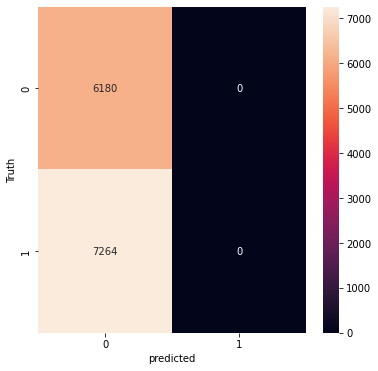

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

In [ ]:
y_prediction = model.predict(test_features)
y_prediction

32551/32551 [==============================] - 50s 2ms/step


array([[0.49598214],
       [0.36743483],
       [0.87494594],
       ...,
       [0.23199601],
       [0.81686217],
       [0.60016924]], dtype=float32)

In [ ]:
y_prediction1 = []
for i in y_prediction:
  if i>0.5:
    y_prediction1.append(1)
  else:
    y_prediction1.append(0)

In [ ]:
submit = pd.DataFrame({'patient-Uid':df_test1["Patient-Uid"],'label':y_prediction1})
submit

,patient-Uid,label
23912,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,0
23913,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,0
23914,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,1
23915,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,1
23916,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,0
...,...,...
1065519,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,0
1065520,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,1
1065521,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,0
1065522,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,1


In [ ]:
submit.reset_index(inplace=True)

In [ ]:
submit.drop("index",axis=1,inplace=True)

In [ ]:
submit.head()

,patient-Uid,label
0,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,0
1,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,0
2,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,1
3,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,1
4,a0fa1423-1c7c-11ec-8ed9-16262ee38c7f,0


In [ ]:
submit.to_csv("final_submission.csv",index=False)